# Exploring Dandiset 001335: Neuropixels Recordings from Hippocampus during Odor Presentation

> **IMPORTANT NOTE**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.

## Introduction

This notebook demonstrates how to access and analyze Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation. The dataset includes:

- Local field potentials (LFP) from 64 electrodes
- Spike times from 283 sorted units
- Information about timing of odor presentations
- Experimental blocks with different odor sequences

We'll explore how to:
1. Load the Dandiset and access its metadata
2. Examine the experimental structure
3. Visualize electrode positions
4. Analyze neural signals (LFP and spikes)
5. Investigate neural responses to odor stimuli

## Required Packages

To run this notebook, you'll need the following packages:
- `dandi`: For accessing data from the DANDI Archive
- `pynwb`: For working with Neurodata Without Borders (NWB) files
- `lindi`: For remote access to NWB files
- `numpy`: For numerical operations
- `matplotlib`: For visualization
- `scipy`: For signal processing

Note: All of these packages are pre-installed in the DANDI computational environment.

## 1. Accessing the Dandiset

Let's start by using the DANDI API to get information about the Dandiset and its assets:

In [1]:
from dandi.dandiapi import DandiAPIClient
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

# Initialize the DANDI API client
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())

# Print basic information about the Dandiset
print(f"Dandiset ID: {dandiset.identifier}")

# Access metadata properly
metadata = dandiset.get_raw_metadata()
print(f"Dandiset Name: {metadata['name']}")
print(f"Description: {metadata['description']}")
print(f"Number of assets: {len(assets)}")

# Display assets information
print("\nAssets:")
for asset in assets:
    print(f"Path: {asset.path}")
    print(f"Size: {asset.size / 1e6:.2f} MB")
    print(f"Asset ID: {asset.identifier}")

Dandiset ID: 001335
Dandiset Name: Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation
Description: Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.
Number of assets: 1

Assets:
Path: sub-M541/sub-M541_ecephys.nwb
Size: 1374.26 MB
Asset ID: aca66db7-4c02-4453-8dcb-a179d44b1c5d


## 2. Loading and Examining the NWB File

Now that we have identified the NWB file in this dataset, let's load it using `pynwb` and `lindi` (for remote access). We'll start by exploring the basic structure of the dataset.

In [2]:
import pynwb
import lindi

# Load the NWB file using lindi for remote access
# The lindi URL is used to access the file efficiently over the network
asset_id = assets[0].identifier  # Get the asset ID from the first asset
print(f"Loading NWB file with asset ID: {asset_id}")

# Create the URL to load the file
f = lindi.LindiH5pyFile.from_lindi_file(f"https://lindi.neurosift.org/dandi/dandisets/001335/assets/{asset_id}/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Examine basic session information
print("\n===== Session Information =====")
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")
print(f"Keywords: {nwb.keywords}")

# Print subject information
print("\n===== Subject Information =====")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Loading NWB file with asset ID: aca66db7-4c02-4453-8dcb-a179d44b1c5d



===== Session Information =====
Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Experiment description: Head-fixed mouse presented with odor sequences
Institution: Dartmouth College
Lab: vandermeerlab
Keywords: <LindiH5pyDataset: /general/keywords>

===== Subject Information =====
Subject ID: M541
Species: Mus musculus
Sex: M
Age: P8W/
Description: Headbarr-ed mouse with craniotomies over dCA1


## 3. Exploring Experimental Design

The experiment consists of three blocks, where the mouse was presented with different odor sequences. Let's explore the structure of these blocks and the timing of odor presentations.

In [3]:
# Explore experimental blocks
print("\n===== Blocks =====")
for block_name in ["Block 1", "Block 2", "Block 3"]:
    block = nwb.intervals[block_name]
    start_time = block["start_time"][0]
    stop_time = block["stop_time"][0]
    duration = stop_time - start_time
    print(f"{block_name}: Start={start_time:.2f}s, Stop={stop_time:.2f}s, Duration={duration:.2f}s")

# Explore odor presentations
print("\n===== Odor Presentations =====")
for odor in ["A", "B", "C", "D", "E", "F"]:
    odor_intervals = nwb.intervals[f"Odor {odor} ON"]
    num_presentations = len(odor_intervals["start_time"])
    avg_duration = np.mean(odor_intervals["stop_time"][:] - odor_intervals["start_time"][:])
    print(f"Odor {odor}: {num_presentations} presentations, Avg duration: {avg_duration:.4f}s")


===== Blocks =====
Block 1: Start=616.00s, Stop=2144.00s, Duration=1528.00s
Block 2: Start=2712.00s, Stop=4243.00s, Duration=1531.00s
Block 3: Start=4859.00s, Stop=6182.00s, Duration=1323.00s

===== Odor Presentations =====
Odor A: 101 presentations, Avg duration: 2.0012s
Odor B: 101 presentations, Avg duration: 2.0000s
Odor C: 101 presentations, Avg duration: 2.0012s
Odor D: 101 presentations, Avg duration: 2.0000s
Odor E: 101 presentations, Avg duration: 2.0012s
Odor F: 101 presentations, Avg duration: 2.0000s


### Visualizing Odor Presentation Patterns

Based on the session description and our exploration, we know that:
- Block 1 uses odors A, B, C (labeled as "UE" or unexpected events)
- Block 2 uses odors D, E, F (labeled as "SE" or sequential events)
- Block 3 is a "Localizer" block

Let's visualize the odor presentation patterns for each block to better understand the experimental design.

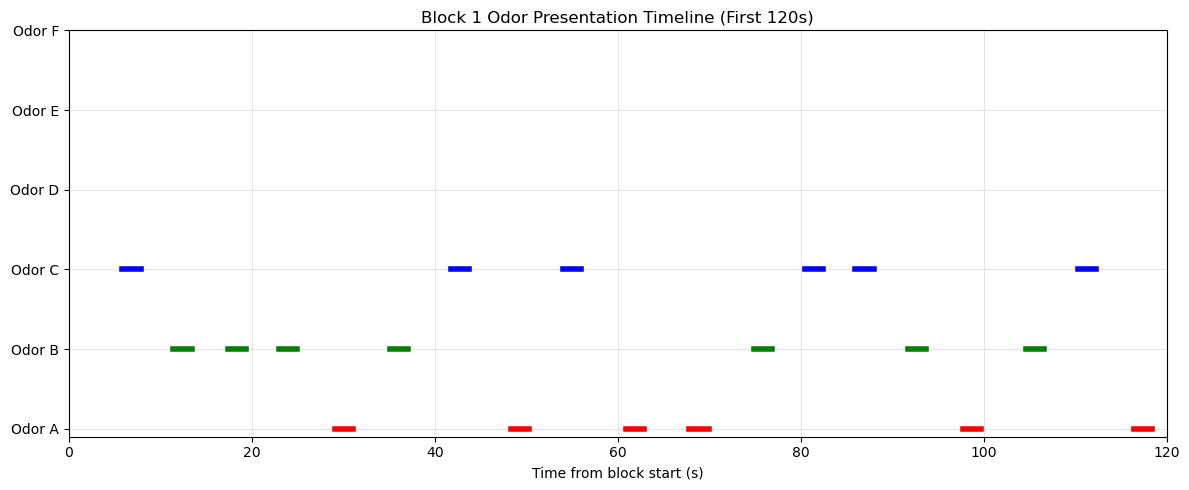

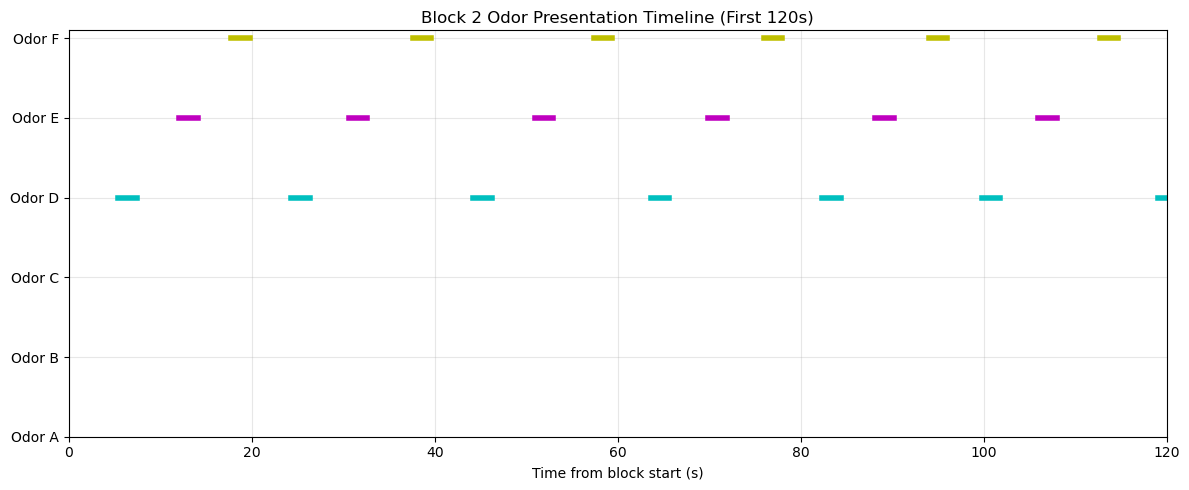

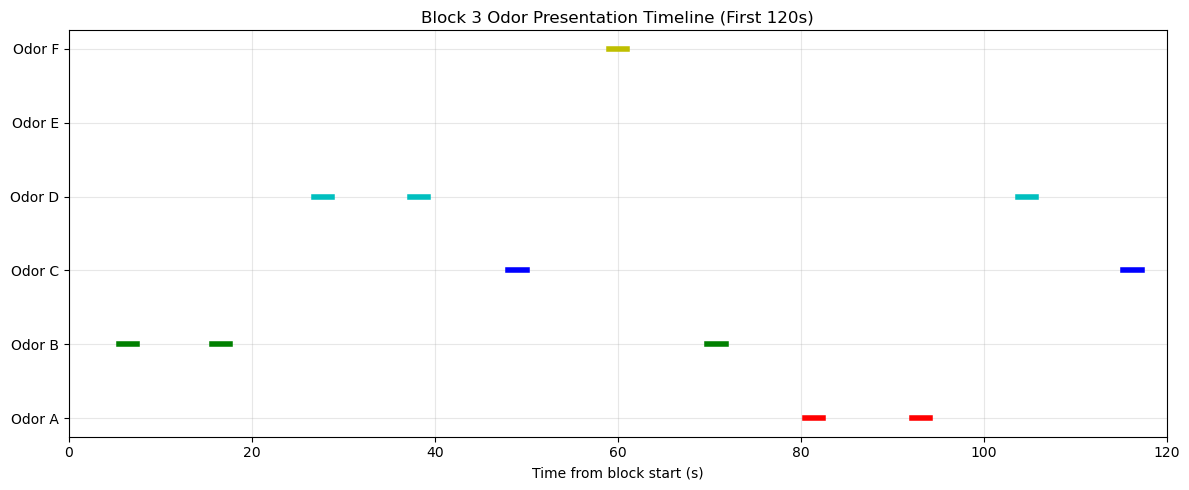

In [4]:
# Get block time intervals
blocks = {}
for block_name in ["Block 1", "Block 2", "Block 3"]:
    block = nwb.intervals[block_name]
    blocks[block_name] = {
        'start': block["start_time"][0],
        'stop': block["stop_time"][0]
    }

# Get odor presentation times
odors = {}
for odor in ["A", "B", "C", "D", "E", "F"]:
    odor_intervals = nwb.intervals[f"Odor {odor} ON"]
    odors[odor] = {
        'starts': odor_intervals["start_time"][:],
        'stops': odor_intervals["stop_time"][:]
    }

# Create odor presentation plots for each block
colors = ['r', 'g', 'b', 'c', 'm', 'y']
odor_labels = ['A', 'B', 'C', 'D', 'E', 'F']

# Function to plot odor presentations for a block
def plot_odor_timeline(block_name, duration=120):
    plt.figure(figsize=(12, 5))
    block_start = blocks[block_name]['start']
    block_stop = blocks[block_name]['stop']
    
    # Limit to specified duration (or block duration if shorter)
    plot_end = min(block_start + duration, block_stop)
    
    # Plot each odor's presentations
    for i, odor in enumerate(odor_labels):
        starts = odors[odor]['starts']
        stops = odors[odor]['stops']
        
        # Filter to current block
        mask = (starts >= block_start) & (starts < plot_end)
        block_starts = starts[mask]
        block_stops = stops[mask]
        
        # Plot each presentation (converting to block-relative time)
        for j in range(len(block_starts)):
            rel_start = block_starts[j] - block_start
            rel_stop = block_stops[j] - block_start
            plt.plot([rel_start, rel_stop], [i+1, i+1], color=colors[i], linewidth=4)
    
    plt.yticks(range(1, len(odor_labels)+1), [f'Odor {odor}' for odor in odor_labels])
    plt.xlabel('Time from block start (s)')
    plt.title(f'{block_name} Odor Presentation Timeline (First {duration}s)')
    plt.xlim(0, min(duration, block_stop - block_start))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

# Plot the timelines for each block
for block_name in blocks.keys():
    plot_odor_timeline(block_name)
    plt.show()

### Observations on Experimental Design

Based on the visualizations:

1. **Block 1 (UE - ABC)**: 
   - Uses odors A, B, and C
   - Odors appear to be presented in a more irregular pattern
   - This "UE" likely stands for "Unexpected Events"

2. **Block 2 (SE - DEF)**:
   - Uses odors D, E, and F
   - Odors follow a more regular, sequential pattern (D → E → F → D → etc.)
   - "SE" likely stands for "Sequential Events"

3. **Block 3 (Localizer)**:
   - Uses various odors from both previous blocks
   - More sparse presentations with less regular timing
   - Likely designed to identify neural responses to individual odors

These different presentation patterns allow researchers to investigate how hippocampal neurons respond to both predictable sequences and unexpected odor presentations.

## 4. Exploring LFP and Electrode Data

The dataset contains Local Field Potential (LFP) recordings from 64 electrodes implanted in the hippocampus. Let's examine these electrodes and the LFP data.


===== Electrode Information =====
Number of electrodes: 64
Electrode columns: ('location', 'group', 'group_name', 'label', 'depth', 'hemisphere')
Electrode locations: ['brain area']


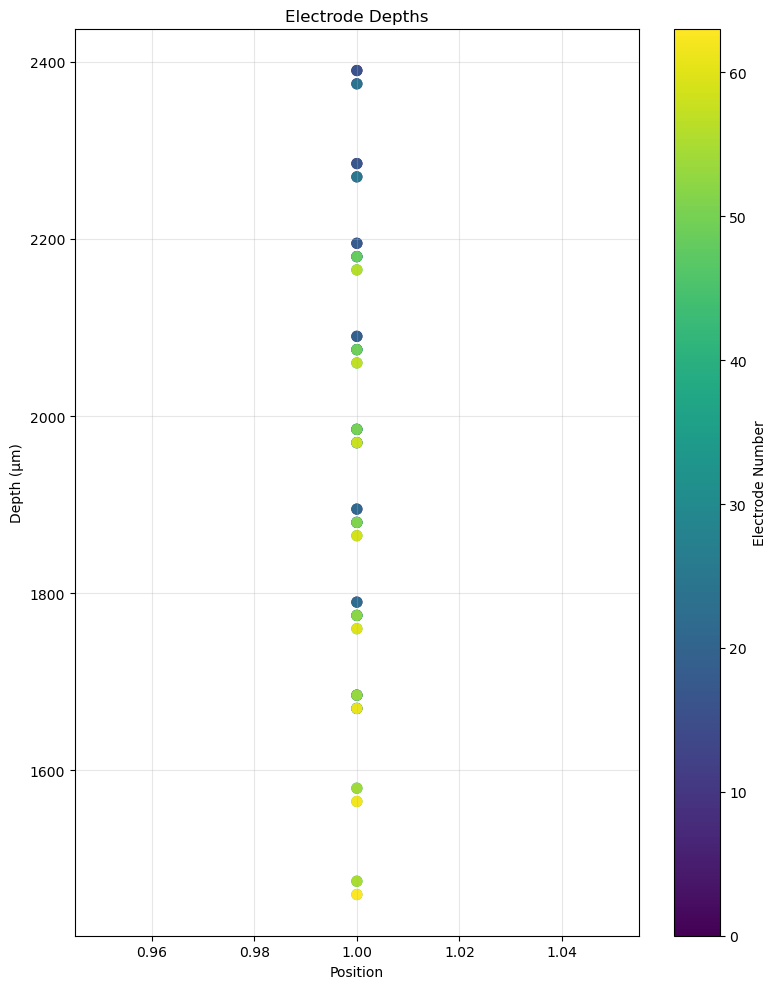


===== LFP Data Information =====
LFP data shape: (15475276, 64)
LFP sampling rate: 2500.0 Hz
LFP duration: 6190.11 seconds
Number of channels: 64


In [5]:
# Get electrode information
electrodes = nwb.electrodes
print("\n===== Electrode Information =====")
print(f"Number of electrodes: {len(electrodes['id'].data[:])}")
print(f"Electrode columns: {electrodes.colnames}")
locations = np.unique(electrodes['location'].data[:])
print(f"Electrode locations: {locations}")

# Plot electrode depths
depths = electrodes['depth'].data[:]
plt.figure(figsize=(8, 10))
plt.scatter(np.ones(len(depths)), depths, c=range(len(depths)), cmap='viridis', s=50)
plt.xlabel('Position')
plt.ylabel('Depth (µm)')
plt.title('Electrode Depths')
plt.colorbar(label='Electrode Number')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Get LFP data
lfp = nwb.processing["ecephys"]["LFP"]
print("\n===== LFP Data Information =====")
print(f"LFP data shape: {lfp.data.shape}")
print(f"LFP sampling rate: {lfp.rate} Hz")
print(f"LFP duration: {lfp.data.shape[0]/lfp.rate:.2f} seconds")
print(f"Number of channels: {lfp.data.shape[1]}")

### Visualizing LFP Traces

Let's extract a small segment of LFP data from each block and visualize the traces to get a sense of the neural activity patterns.


Plotting LFP segment from Block 1 at time 1380.0s


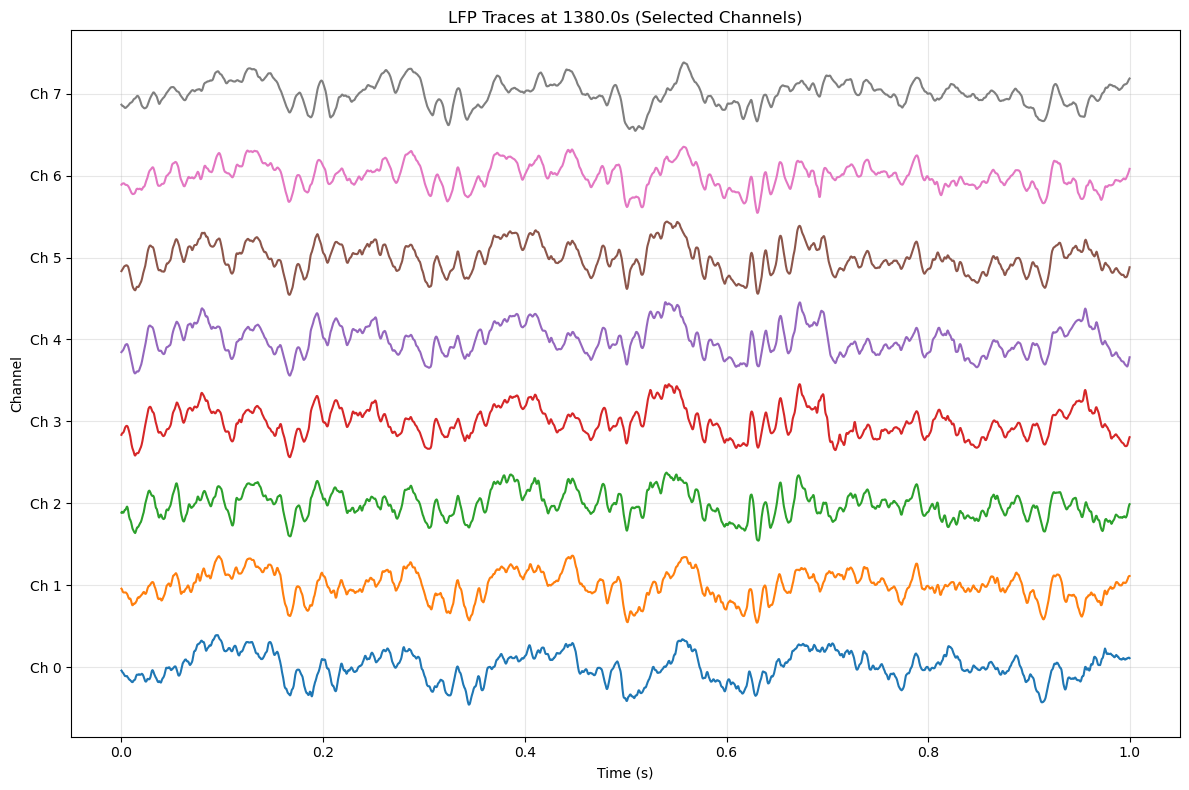


Plotting LFP segment from Block 2 at time 3477.5s


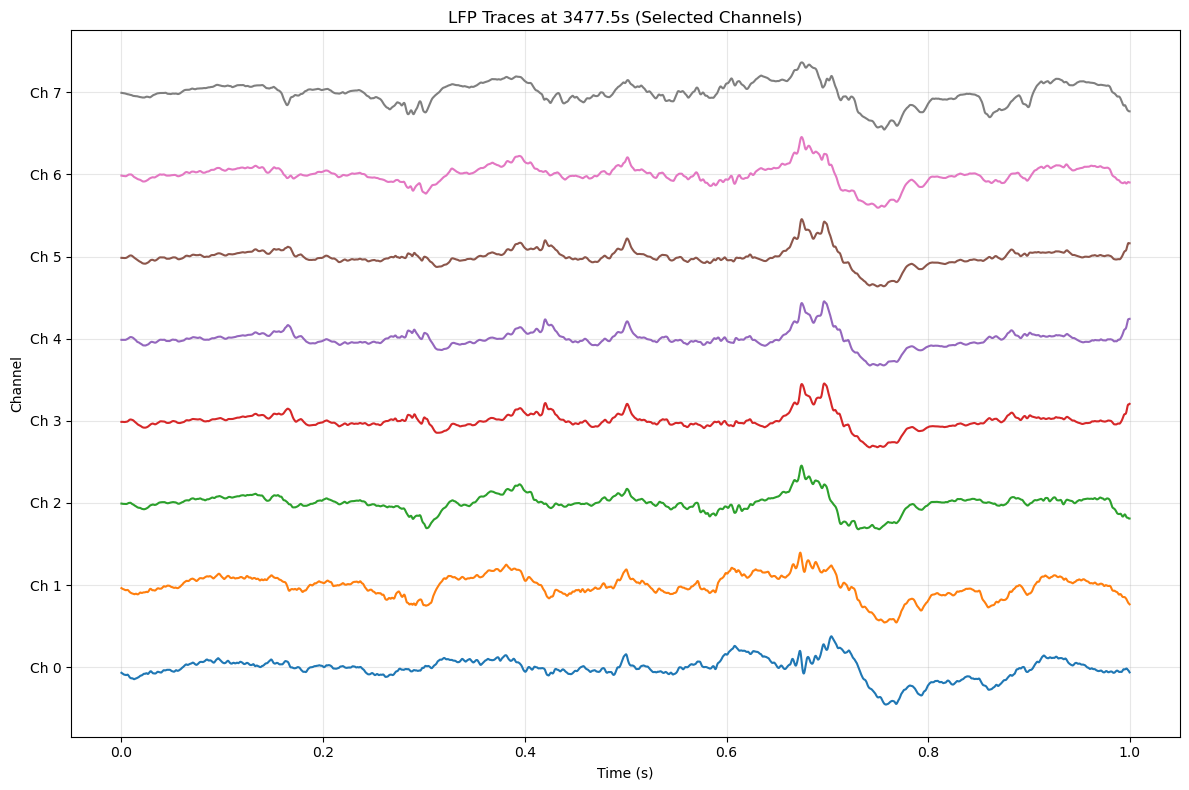


Plotting LFP segment from Block 3 at time 5520.5s


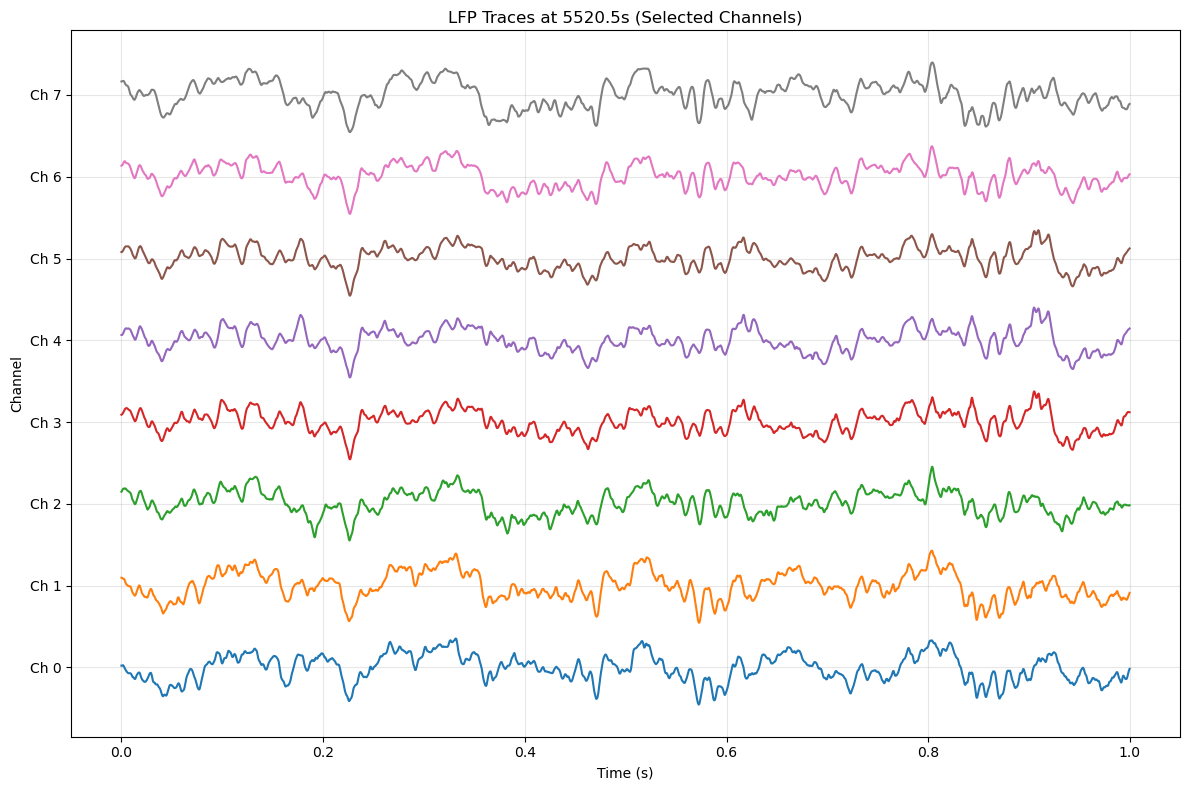

In [6]:
# Function to plot LFP traces from a segment of time
def plot_lfp_segment(start_time, duration=1.0, channels=range(8)):
    # Convert time to samples
    sampling_rate = lfp.rate
    start_sample = int(start_time * sampling_rate)
    samples = int(duration * sampling_rate)
    
    # Ensure we don't exceed data bounds
    if start_sample + samples >= lfp.data.shape[0]:
        start_sample = lfp.data.shape[0] - samples - 1
    
    # Get data segment for selected channels
    segment = lfp.data[start_sample:start_sample+samples, channels]
    
    # Create plot
    plt.figure(figsize=(12, 8))
    time = np.arange(segment.shape[0]) / sampling_rate
    
    # Plot each channel with offset for visibility
    for i, ch in enumerate(channels):
        # Normalize and offset
        trace = segment[:, i] / np.max(np.abs(segment[:, i]))
        plt.plot(time, trace + i*2.2, label=f'Ch {ch}')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Channel')
    plt.title(f'LFP Traces at {start_time:.1f}s (Selected Channels)')
    plt.yticks(np.arange(0, len(channels)*2.2, 2.2), [f'Ch {ch}' for ch in channels])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot LFP segment from each block
for block_name, block_times in blocks.items():
    # Get segment from middle of block
    mid_time = (block_times['start'] + block_times['stop']) / 2
    print(f"\nPlotting LFP segment from {block_name} at time {mid_time:.1f}s")
    plot_lfp_segment(mid_time)

### Time-Frequency Analysis of LFP

Let's perform a time-frequency analysis of the LFP data from one channel to visualize the spectral content of the neural activity.

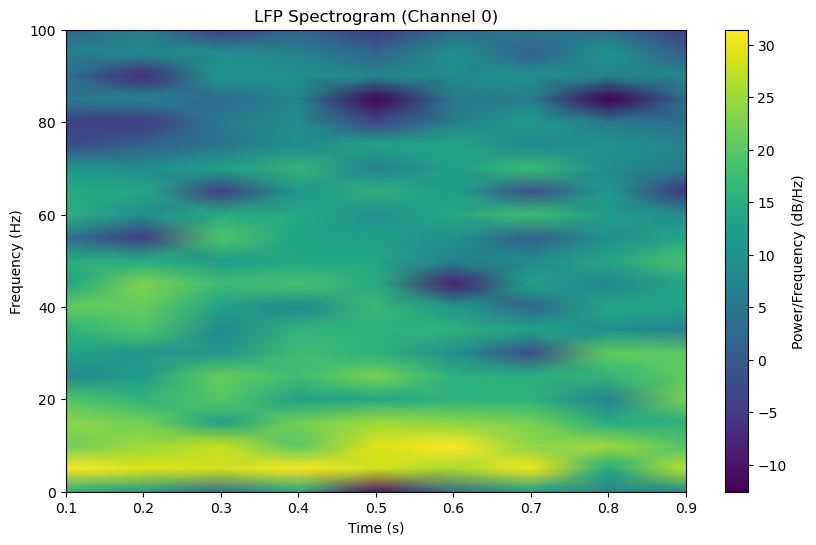

In [7]:
# Select a segment from Block 1 for spectral analysis
block1_mid = (blocks["Block 1"]['start'] + blocks["Block 1"]['stop']) / 2
sampling_rate = lfp.rate
segment_duration = 1.0  # 1 second
start_sample = int(block1_mid * sampling_rate)
samples = int(segment_duration * sampling_rate)

# Get data from channel 0
if start_sample + samples >= lfp.data.shape[0]:
    start_sample = lfp.data.shape[0] - samples - 1
lfp_segment = lfp.data[start_sample:start_sample+samples, 0]

# Calculate spectrogram
nperseg = int(0.2 * sampling_rate)  # 200 ms segments
noverlap = nperseg // 2
f, t, Sxx = signal.spectrogram(lfp_segment, fs=sampling_rate, nperseg=nperseg, noverlap=noverlap)

# Plot spectrogram up to 100 Hz
freq_mask = f <= 100
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f[freq_mask], 10 * np.log10(Sxx[freq_mask, :]), shading='gouraud', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('LFP Spectrogram (Channel 0)')
plt.show()

## 5. Exploring Spike Data

The dataset contains spike times from 283 sorted units. Let's examine the distribution of spike counts and the waveform shapes.


===== Units Information =====
Number of units: 283
Units columns: ('depth', 'hemisphere', 'global_id', 'spike_times', 'electrode_group', 'waveform_mean')


Total number of spikes across all units: 5260124
Average spikes per unit: 18587.01
Min spikes in a unit: 208
Max spikes in a unit: 165824


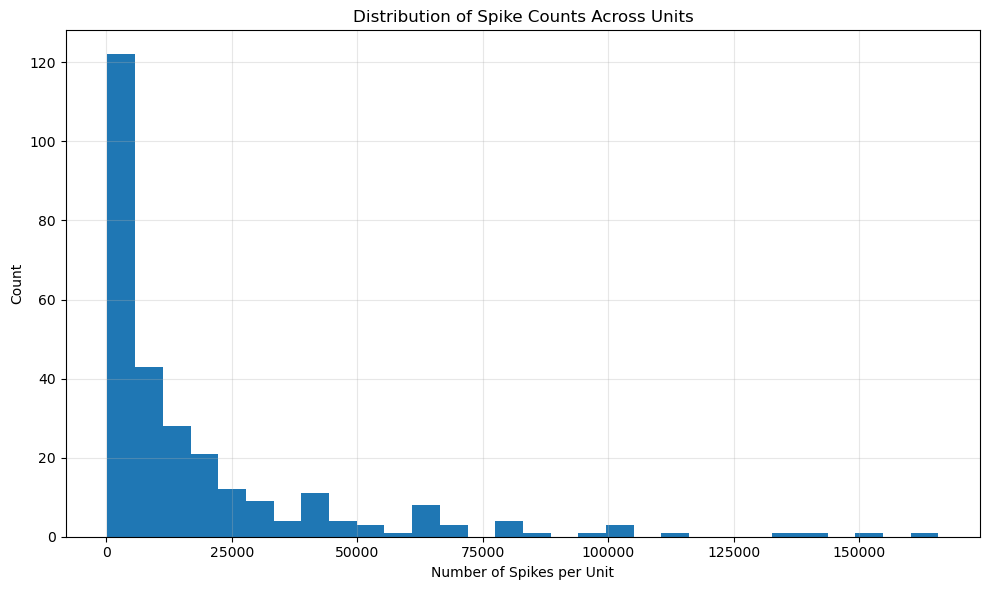

In [8]:
# Explore units (neurons)
units = nwb.units
print("\n===== Units Information =====")
print(f"Number of units: {len(units['id'].data)}")
print(f"Units columns: {units.colnames}")

# Count spikes per unit
total_spikes = 0
spike_counts = []
for i in range(len(units['id'].data)):
    spike_times = units["spike_times"][i]
    spike_count = len(spike_times)
    spike_counts.append(spike_count)
    total_spikes += spike_count

spike_counts = np.array(spike_counts)
print(f"Total number of spikes across all units: {total_spikes}")
print(f"Average spikes per unit: {np.mean(spike_counts):.2f}")
print(f"Min spikes in a unit: {np.min(spike_counts)}")
print(f"Max spikes in a unit: {np.max(spike_counts)}")

# Plot histogram of spike counts
plt.figure(figsize=(10, 6))
plt.hist(spike_counts, bins=30)
plt.xlabel('Number of Spikes per Unit')
plt.ylabel('Count')
plt.title('Distribution of Spike Counts Across Units')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Examining Spike Waveforms

Let's examine the spike waveforms for units with different firing rates to understand the types of neurons recorded.

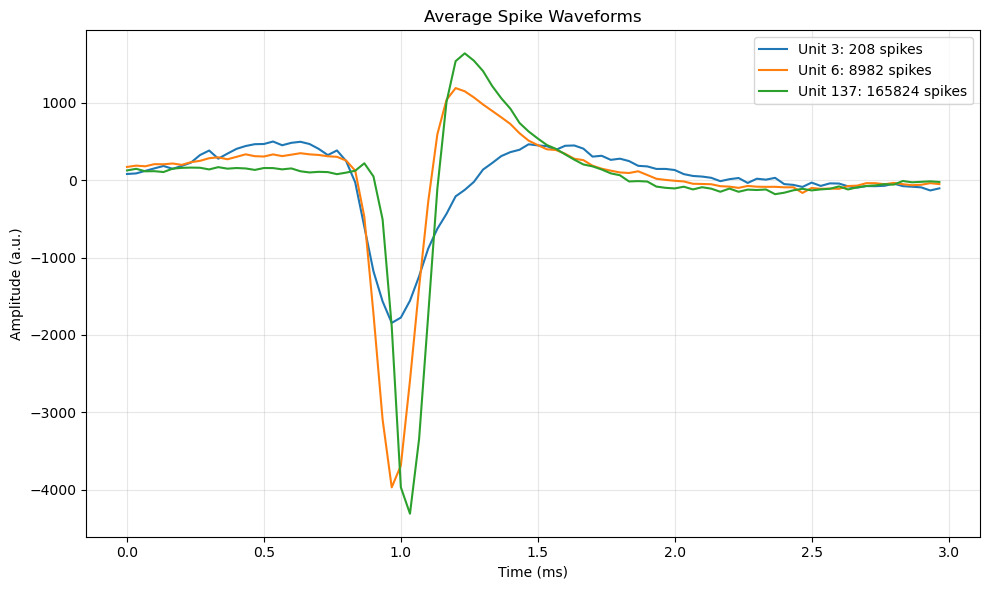

In [9]:
# Get waveforms
waveforms = units['waveform_mean'].data[:]

# Find index of units with low, medium and high spike counts
low_idx = np.argmin(spike_counts)
high_idx = np.argmax(spike_counts)
med_idx = np.argsort(spike_counts)[len(spike_counts)//2]

plt.figure(figsize=(10, 6))
# Create time axis (assuming 30 kHz sampling for the waveforms)
time_axis = np.arange(waveforms.shape[1]) / 30  # in ms

# Plot waveforms
plt.plot(time_axis, waveforms[low_idx], label=f'Unit {units["id"].data[low_idx]}: {spike_counts[low_idx]} spikes')
plt.plot(time_axis, waveforms[med_idx], label=f'Unit {units["id"].data[med_idx]}: {spike_counts[med_idx]} spikes')
plt.plot(time_axis, waveforms[high_idx], label=f'Unit {units["id"].data[high_idx]}: {spike_counts[high_idx]} spikes')

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Average Spike Waveforms')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Analyzing Neural Responses to Odors

Now let's examine how neurons respond to odor presentations. We'll create raster plots and PSTHs (Peri-Stimulus Time Histograms) aligned to odor onset to visualize the neural responses.

In [10]:
# Function to create raster plot and PSTH for a unit's response to odor onset
def plot_unit_odor_response(unit_idx, odor_label, window=(-1, 3), bin_size=0.05):
    unit_id = units['id'].data[unit_idx]
    spike_times = units["spike_times"][unit_idx]
    
    # Get list of odor onset times
    onset_times = odors[odor_label]['starts']
    
    # For each odor onset, get spikes within window
    aligned_spikes = []
    for onset in onset_times:
        # Find spikes within window relative to onset
        mask = (spike_times >= onset + window[0]) & (spike_times <= onset + window[1])
        relative_times = spike_times[mask] - onset
        aligned_spikes.append(relative_times)
    
    # Create figure with two subplots (raster and PSTH)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Create raster plot
    for i, spikes in enumerate(aligned_spikes):
        ax1.plot(spikes, np.ones_like(spikes) * i, '|', color='black', markersize=4)
    
    ax1.set_ylabel('Trial #')
    ax1.set_title(f'Unit {unit_id} Response to Odor {odor_label}')
    
    # Create PSTH
    bins = np.arange(window[0], window[1], bin_size)
    all_spikes = np.concatenate(aligned_spikes)
    hist, bin_edges = np.histogram(all_spikes, bins=bins)
    # Convert to firing rate (Hz)
    firing_rate = hist / (len(onset_times) * bin_size)
    
    ax2.bar(bin_edges[:-1], firing_rate, width=bin_size, color='blue', alpha=0.6)
    ax2.axvline(x=0, color='red', linestyle='--', label='Odor Onset')
    ax2.axvline(x=2, color='red', linestyle=':', label='Approx. Odor Offset')
    ax2.set_xlabel('Time from Odor Onset (s)')
    ax2.set_ylabel('Firing Rate (Hz)')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return firing_rate, bins

Let's analyze the response of the highest-firing unit to different odors:

Analyzing unit 137 with 165824 spikes

Response to Odor A (Block 1):


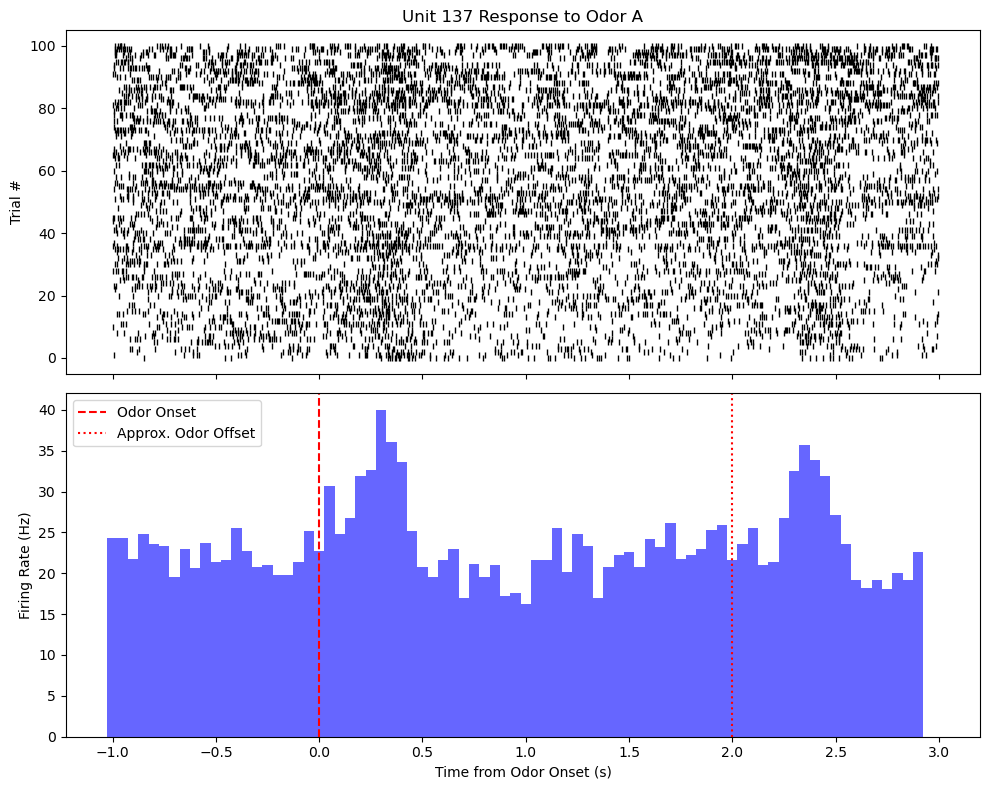


Response to Odor E (Block 2):


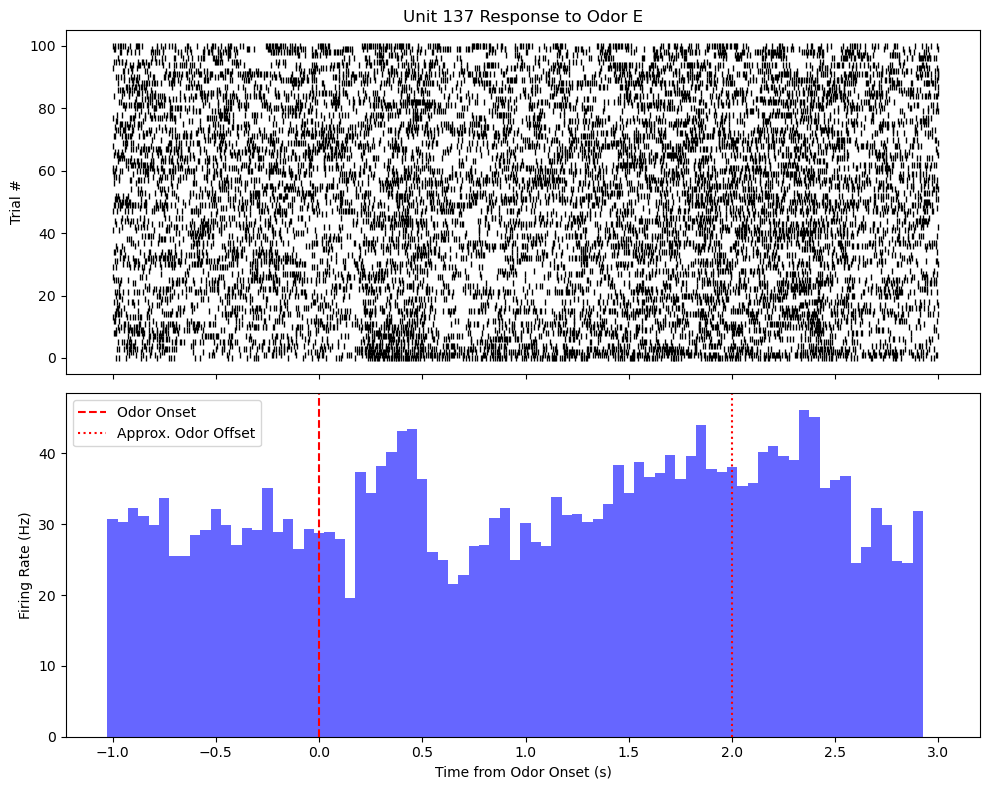

(array([30.69306931, 30.2970297 , 32.27722772, 31.08910891, 29.9009901 ,
        33.66336634, 25.54455446, 25.54455446, 28.51485149, 29.10891089,
        32.07920792, 29.9009901 , 27.12871287, 29.5049505 , 29.10891089,
        35.04950495, 28.91089109, 30.69306931, 26.53465347, 29.30693069,
        28.71287129, 28.91089109, 27.92079208, 19.6039604 , 37.42574257,
        34.45544554, 38.21782178, 40.1980198 , 43.16831683, 43.36633663,
        36.43564356, 26.13861386, 24.95049505, 21.58415842, 22.77227723,
        26.93069307, 27.12871287, 30.89108911, 32.27722772, 24.95049505,
        30.0990099 , 27.52475248, 26.93069307, 33.86138614, 31.28712871,
        31.48514851, 30.2970297 , 30.69306931, 32.87128713, 38.41584158,
        34.45544554, 38.81188119, 36.63366337, 37.22772277, 39.8019802 ,
        36.43564356, 39.6039604 , 43.96039604, 37.82178218, 37.42574257,
        38.01980198, 35.44554455, 35.84158416, 40.1980198 , 40.99009901,
        39.6039604 , 39.00990099, 46.13861386, 45.1

In [11]:
# Select the highest-firing unit for analysis
highest_unit_idx = np.argmax(spike_counts)
highest_unit_id = units['id'].data[highest_unit_idx]
print(f"Analyzing unit {highest_unit_id} with {spike_counts[highest_unit_idx]} spikes")

# Select one odor from each block
block1_odor = "A"  # From Block 1 (UE)
block2_odor = "E"  # From Block 2 (SE)

# Plot responses to selected odors
print(f"\nResponse to Odor {block1_odor} (Block 1):")
plot_unit_odor_response(highest_unit_idx, block1_odor)

print(f"\nResponse to Odor {block2_odor} (Block 2):")
plot_unit_odor_response(highest_unit_idx, block2_odor)

### Comparing Responses to Multiple Odors

Now let's compare how the unit responds to different odors within the same block:

Analyzing response to Odor A...


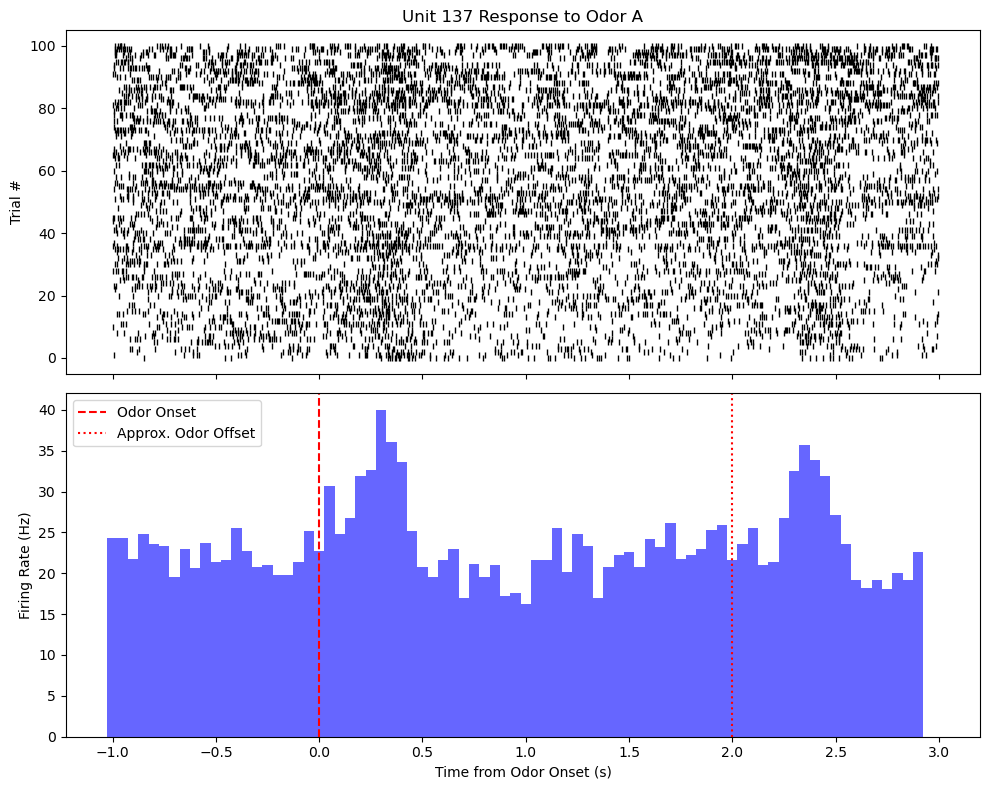

Analyzing response to Odor B...


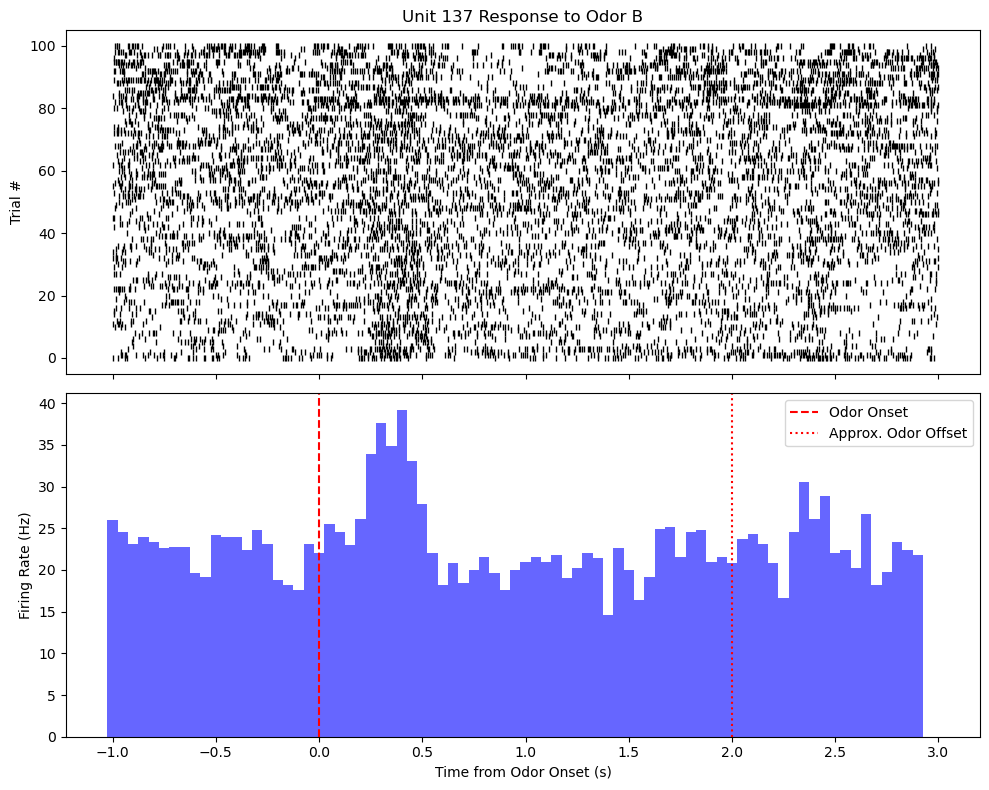

Analyzing response to Odor C...


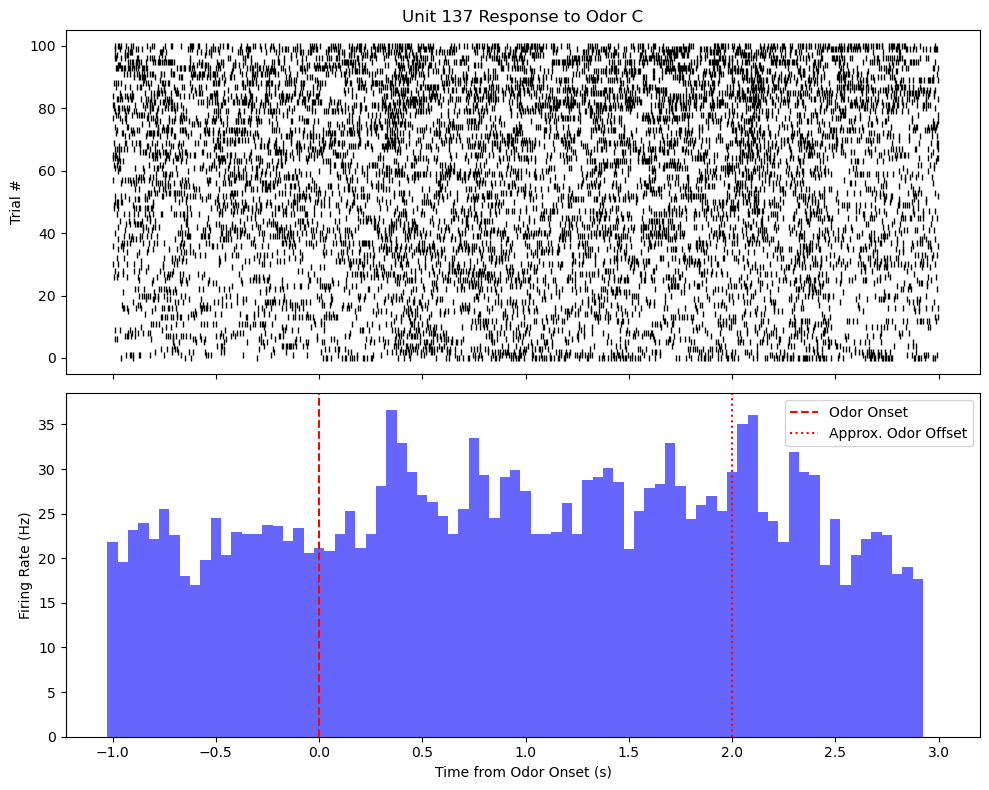

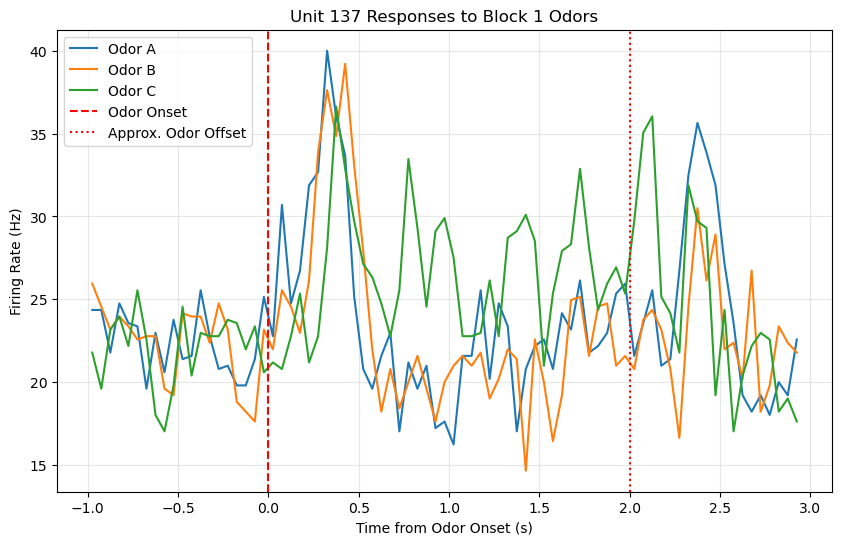

In [12]:
# Compare responses to Block 1 odors (A, B, C)
block1_odors = ["A", "B", "C"]
firing_rates = {}
bin_centers = None

for odor in block1_odors:
    print(f"Analyzing response to Odor {odor}...")
    fr, bins = plot_unit_odor_response(highest_unit_idx, odor)
    firing_rates[odor] = fr
    if bin_centers is None:
        bin_centers = (bins[:-1] + bins[1:]) / 2

# Plot comparison of responses
plt.figure(figsize=(10, 6))
for odor in block1_odors:
    plt.plot(bin_centers, firing_rates[odor], label=f'Odor {odor}')

plt.axvline(x=0, color='red', linestyle='--', label='Odor Onset')
plt.axvline(x=2, color='red', linestyle=':', label='Approx. Odor Offset')
plt.xlabel('Time from Odor Onset (s)')
plt.ylabel('Firing Rate (Hz)')
plt.title(f'Unit {highest_unit_id} Responses to Block 1 Odors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 7. Population Analysis

Let's look at the responses of multiple units to the same odor to understand population-level encoding:

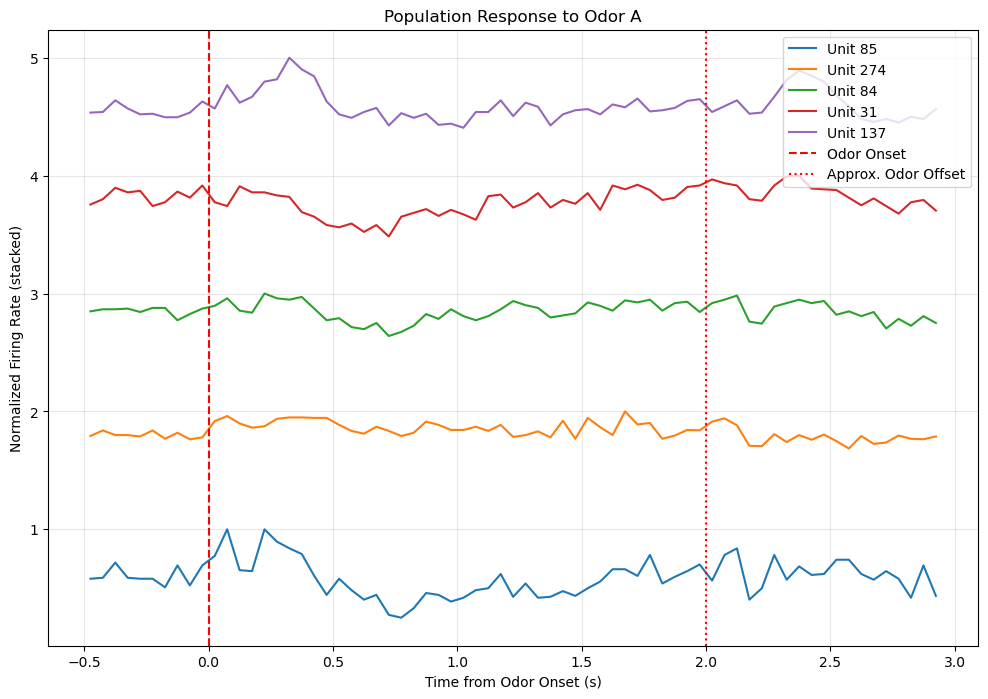

In [13]:
# Select a few units with different firing rates for population analysis
num_units = 5
unit_indices = np.argsort(spike_counts)[-num_units:]  # Top 5 most active units
odor = "A"  # Analyze Odor A as an example

# Create a single plot with responses of all selected units
plt.figure(figsize=(12, 8))
for i, unit_idx in enumerate(unit_indices):
    unit_id = units['id'].data[unit_idx]
    spike_times = units["spike_times"][unit_idx]
    
    # Get list of odor onset times
    onset_times = odors[odor]['starts']
    
    # For each onset, get spikes within window
    window = (-0.5, 3)
    bin_size = 0.05
    bins = np.arange(window[0], window[1], bin_size)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    all_spikes = []
    for onset in onset_times:
        # Find spikes within window
        mask = (spike_times >= onset + window[0]) & (spike_times <= onset + window[1])
        relative_times = spike_times[mask] - onset
        all_spikes.extend(relative_times)
    
    # Create PSTH
    hist, _ = np.histogram(all_spikes, bins=bins)
    firing_rate = hist / (len(onset_times) * bin_size)
    
    # Normalize firing rate for better comparison
    norm_fr = firing_rate / np.max(firing_rate) + i  # Offset by unit index for stacking
    
    plt.plot(bin_centers, norm_fr, label=f'Unit {unit_id}', linewidth=1.5)

plt.axvline(x=0, color='red', linestyle='--', label='Odor Onset')
plt.axvline(x=2, color='red', linestyle=':', label='Approx. Odor Offset')
plt.xlabel('Time from Odor Onset (s)')
plt.ylabel('Normalized Firing Rate (stacked)')
plt.title(f'Population Response to Odor {odor}')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

## Summary

In this notebook, we explored Dandiset 001335, which contains Neuropixels recordings from the hippocampus of head-fixed mice during odor presentation experiments. We:

1. Accessed the dataset using the DANDI API
2. Explored the experimental design, which included:
   - Three experimental blocks with different odor presentation patterns
   - Six different odors (A-F) presented across the blocks
3. Visualized electrode positions and LFP data
4. Analyzed spike data and waveforms from individual units
5. Examined neural responses to odor stimuli using raster plots and PSTHs
6. Investigated population-level responses to odors

### Key Observations:

- The experiment was organized into three blocks with different odor presentation patterns:
  - Block 1 (UE): Odors A, B, C in a less predictable pattern
  - Block 2 (SE): Odors D, E, F in a more sequential pattern
  - Block 3 (Localizer): Various odors for identifying neural responses

- Hippocampal neurons showed clear responses to odor presentations:
  - Some units showed both onset and offset responses
  - Different units exhibited different response patterns
  - Neurons showed odor selectivity with varying responses to different odors

### Next Steps for Analysis:

Researchers could extend this analysis by:

1. Comparing neural responses between UE and SE blocks to understand predictability effects
2. Analyzing cohesiveness of population responses across different odor presentations
3. Examining the relationship between LFP oscillations and spike timing
4. Investigating how neural responses evolve over the course of the experiment

This Dandiset provides a rich resource for studying hippocampal encoding of olfactory information and how it might relate to memory and predictive coding.